Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics         import accuracy_score

Connect your Google Drive. 
Since the files are quite big, it is much more convinient to upload them in a cloud service.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Read prepared train-test files

In [ ]:
link_to_drive = '/content/drive/MyDrive/DL_Final_Project/'

In [ ]:
X_val   = np.load(link_to_drive + 'X_val.npy')
X_train = np.load(link_to_drive + 'X_train.npy')
y_val   = np.load(link_to_drive + 'y_val.npy')
y_train = np.load(link_to_drive + 'y_train.npy')
X_test  = np.load(link_to_drive + 'X_test.npy')
y_test  = pd.read_csv(link_to_drive + 'Test.csv')

Build a Convolutional Neural Network (CNN). It is said to be the best for image classification purposes.

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the CNN model

In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/20
491/491 [==============================] - 8s 15ms/step - loss: 2.7952 - accuracy: 0.3195 - val_loss: 1.3159 - val_accuracy: 0.6607
Epoch 2/20
491/491 [==============================] - 8s 16ms/step - loss: 1.1724 - accuracy: 0.6674 - val_loss: 0.5848 - val_accuracy: 0.8653
Epoch 3/20
491/491 [==============================] - 7s 14ms/step - loss: 0.7613 - accuracy: 0.7776 - val_loss: 0.4119 - val_accuracy: 0.8901
Epoch 4/20
491/491 [==============================] - 8s 15ms/step - loss: 0.5948 - accuracy: 0.8257 - val_loss: 0.2298 - val_accuracy: 0.9346
Epoch 5/20
491/491 [==============================] - 8s 16ms/step - loss: 0.4944 - accuracy: 0.8526 - val_loss: 0.1511 - val_accuracy: 0.9617
Epoch 6/20
491/491 [==============================] - 7s 14ms/step - loss: 0.4260 - accuracy: 0.8754 - val_loss: 0.1317 - val_accuracy: 0.9670
Epoch 7/20
491/491 [==============================] - 7s 14ms/step - loss: 0.3657 - accuracy: 0.8924 - val_loss: 0.1011 - val_accuracy: 0.9753

Plot the graphs for accuracy and loss of both datasets

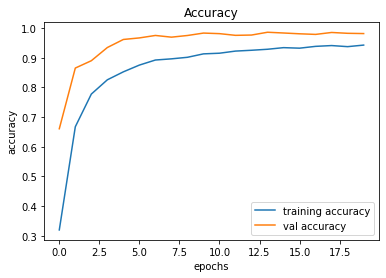

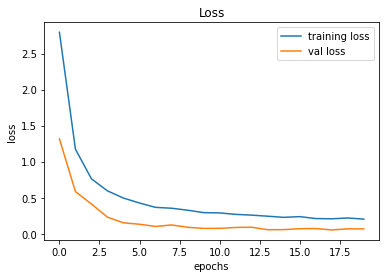

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

Test the trained model with test dataset

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

labels = y_test['ClassId'].values
print(accuracy_score(labels, classes_x))

0.9406967537608868
